# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [14]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

base_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # make request
        response = requests.get(city_url)

        # check the status code
        status_code = response.status_code
        
        # get the data (.json)
        if status_code == 200:
             data = response.json()
        else:
            data = {} # failed request
        
        # Parse the JSON and retrieve data
        city_weather = data["weather"][0]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data.get("coord", {}).get("lat")
        city_lng = data.get("coord", {}).get("lon")
        city_max_temp = data.get("main", {}).get("temp_max")
        city_humidity = data.get("main", {}).get("humidity")
        city_clouds = data.get("clouds", {}).get("all")
        city_wind = data.get("wind", {}).get("speed")
        city_country = data.get("sys", {}).get("country")
        city_date = data.get("dt")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | tazovsky
Processing Record 3 of Set 1 | dalandzadgad
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | puerto aysen
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | college
Processing Record 9 of Set 1 | petropavlovsk-kamchatsky
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | sirathu
Processing Record 12 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 13 of Set 1 | nemuro
Processing Record 14 of Set 1 | sandpoint
Processing Record 15 of Set 1 | lembar
City not found. Skipping...
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | wailua homesteads
Processing Record 18 of Set 1 | mili
Processing Record 19 of Set 1 | nar'yan-mar
Processing Record 20 of Set 1 | mata-utu
Processi

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,70.23,67,82,5.46,PN,1717024208
1,tazovsky,67.4667,78.7000,16.23,95,74,8.28,RU,1717024642
2,dalandzadgad,43.5708,104.4250,57.63,39,26,5.26,MN,1717024642
3,margaret river,-33.9500,115.0667,58.62,66,98,14.32,AU,1717024392
4,puerto aysen,-45.4000,-72.7000,39.67,99,100,3.40,CL,1717024590


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,70.23,67,82,5.46,PN,1717024208
1,tazovsky,67.4667,78.7000,16.23,95,74,8.28,RU,1717024642
2,dalandzadgad,43.5708,104.4250,57.63,39,26,5.26,MN,1717024642
3,margaret river,-33.9500,115.0667,58.62,66,98,14.32,AU,1717024392
4,puerto aysen,-45.4000,-72.7000,39.67,99,100,3.40,CL,1717024590


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

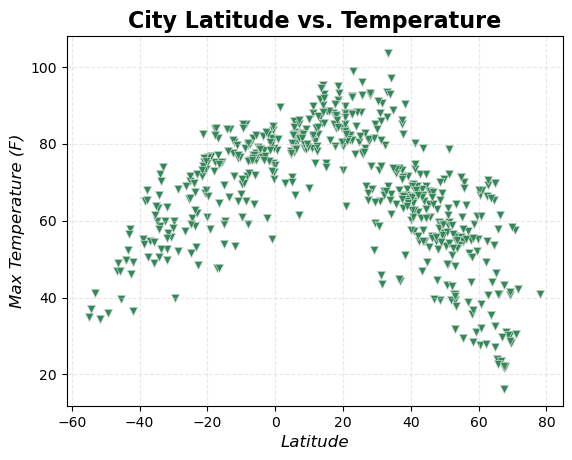

In [46]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color="seagreen", marker="v", edgecolors='lightgrey', lw=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature", fontweight="bold", fontsize=16)
plt.ylabel("Max Temperature (F)", fontsize=12, fontstyle="italic")
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

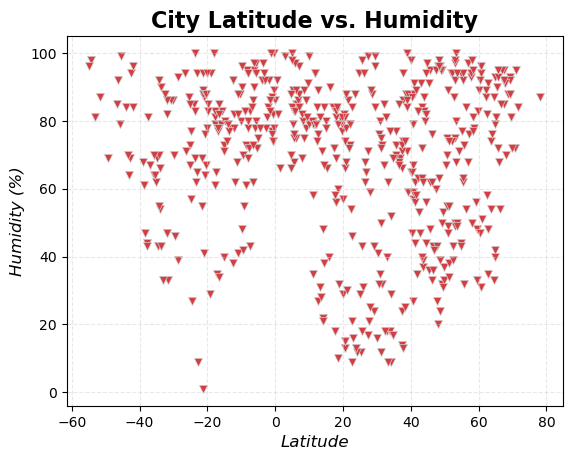

In [50]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color="#D33E43", marker="v", edgecolors='lightgrey', lw=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity", fontweight="bold", fontsize=16)
plt.ylabel("Humidity (%)", fontsize=12, fontstyle="italic")
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

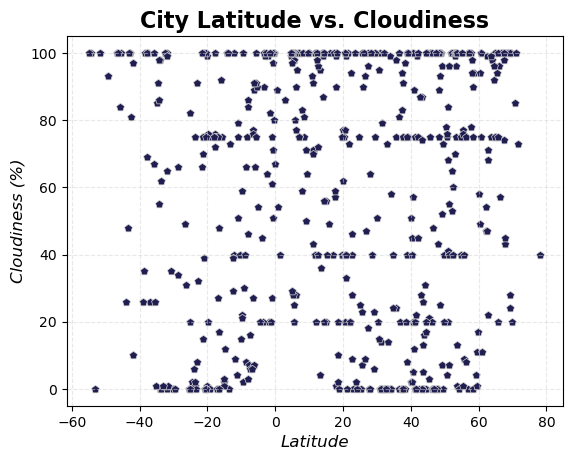

In [54]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="#201E50", marker="p", edgecolors='lightgrey', lw=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness", fontweight="bold", fontsize=16)
plt.ylabel("Cloudiness (%)", fontsize=12, fontstyle="italic")
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

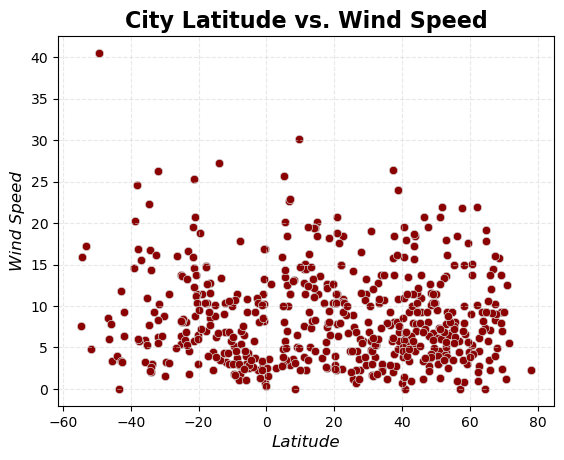

In [56]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color="darkred", marker="o", edgecolors='lightgrey', lw=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed", fontweight="bold", fontsize=16)
plt.ylabel("Wind Speed", fontsize=12, fontstyle="italic")
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [63]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, title="Linear Regression", xlabel="X-axis", ylabel="Y-axis"):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calculate regression line
    regression_line = slope * np.array(x) + intercept

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Data points')
    plt.plot(x, regression_line, color='red', label=f'Linear fit: y={slope:.2f}x+{intercept:.2f}\nR-squared={r_value**2:.2f}') # create a legend with fit information
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

In [58]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tazovsky,67.4667,78.7000,16.23,95,74,8.28,RU,1717024642
2,dalandzadgad,43.5708,104.4250,57.63,39,26,5.26,MN,1717024642
7,college,64.8569,-147.8028,69.75,42,75,9.22,US,1717024642
8,petropavlovsk-kamchatsky,53.0452,158.6483,39.45,75,100,4.47,RU,1717024642
10,sirathu,25.6500,81.3167,96.13,18,23,1.23,IN,1717024643


In [59]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,70.23,67,82,5.46,PN,1717024208
3,margaret river,-33.9500,115.0667,58.62,66,98,14.32,AU,1717024392
4,puerto aysen,-45.4000,-72.7000,39.67,99,100,3.40,CL,1717024590
5,edinburgh of the seven seas,-37.0676,-12.3116,54.77,67,26,15.55,SH,1717024391
6,port-aux-francais,-49.3500,70.2167,35.96,69,93,40.53,TF,1717024389


###  Temperature vs. Latitude Linear Regression Plot

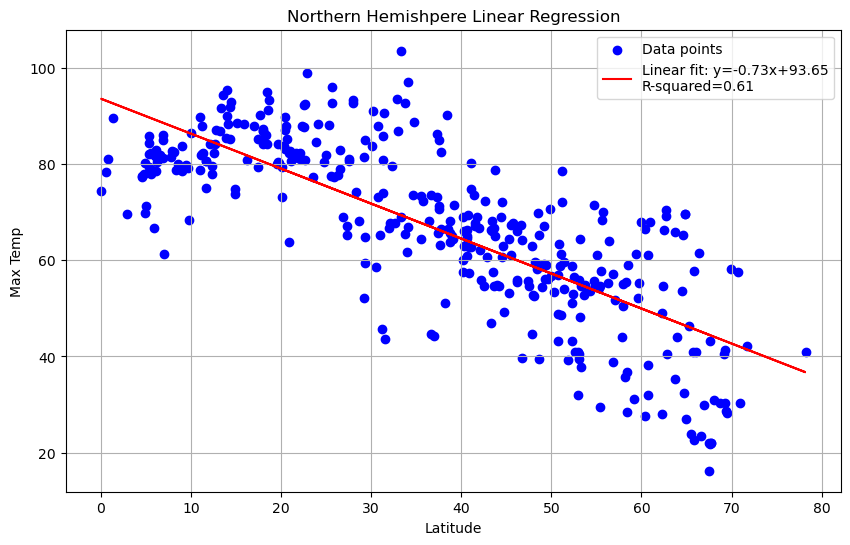

In [69]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], title="Northern Hemishpere Linear Regression", xlabel="Latitude", ylabel="Max Temp")

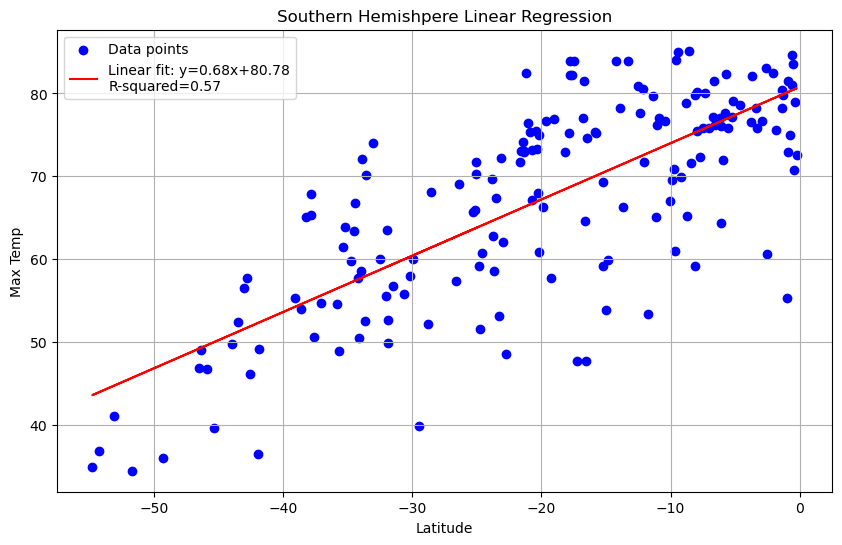

In [70]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], title="Southern Hemishpere Linear Regression", xlabel="Latitude", ylabel="Max Temp")

**Discussion about the linear relationship:** There is a relationship between max temperature and latitude. In the Northern hemisphere this relationship is negative, while in the Southern hemisphere it is positive. These plots show that the cities closer to the equator are more likely to have a higher max temperature.

### Humidity vs. Latitude Linear Regression Plot

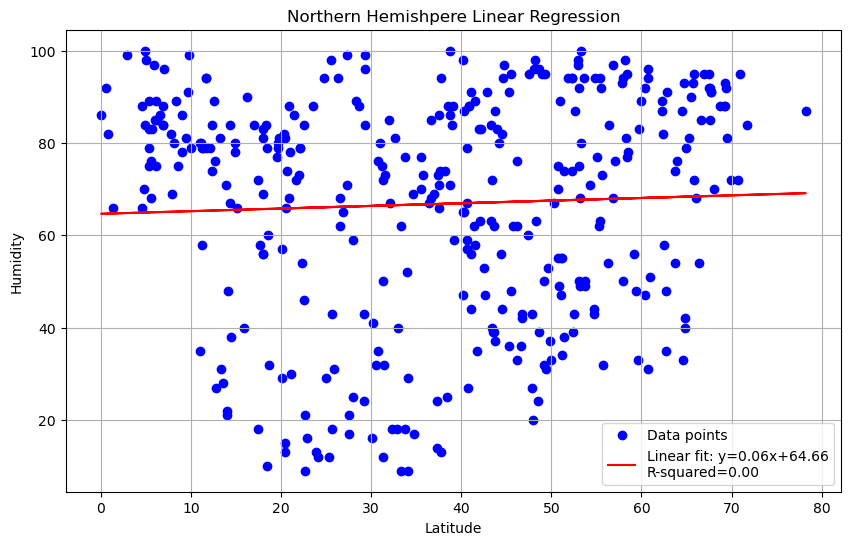

In [71]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], title="Northern Hemishpere Linear Regression", xlabel="Latitude", ylabel="Humidity")

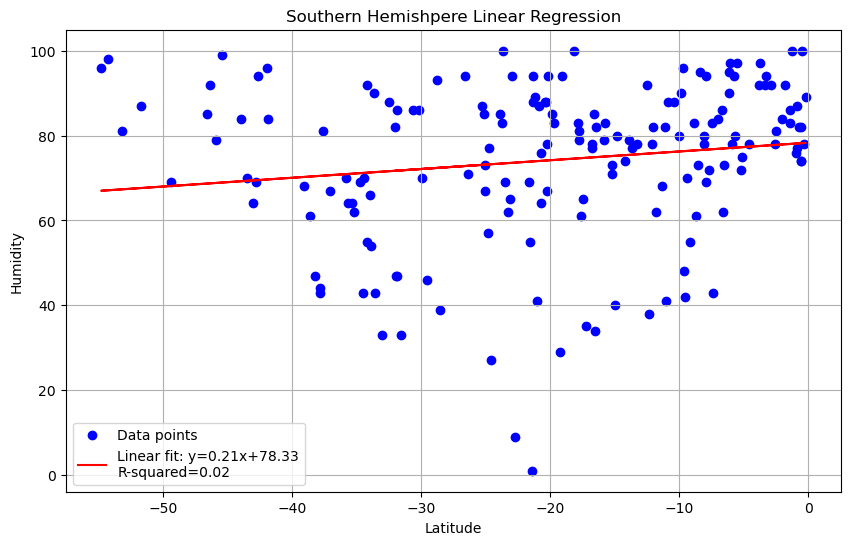

In [72]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], title="Southern Hemishpere Linear Regression", xlabel="Latitude", ylabel="Humidity")

**Discussion about the linear relationship:** With an R-squared of 0.02 and lower for the Southern hemisphere and Northern Hemisphere there is not much of a relationship between humidity and latitude. Although it does appear to vary more in the Northern hemisphere (demostrated by such a low r-squared of 0.00) than in the Southern hemisphere. This could be the result of the sample data points so more data would be needed to reinforce this finding.

### Cloudiness vs. Latitude Linear Regression Plot

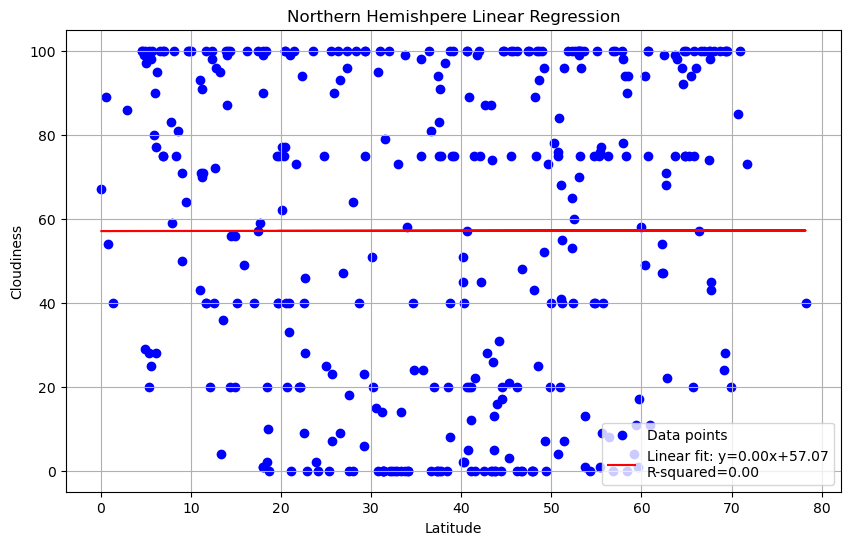

In [73]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], title="Northern Hemishpere Linear Regression", xlabel="Latitude", ylabel="Cloudiness")

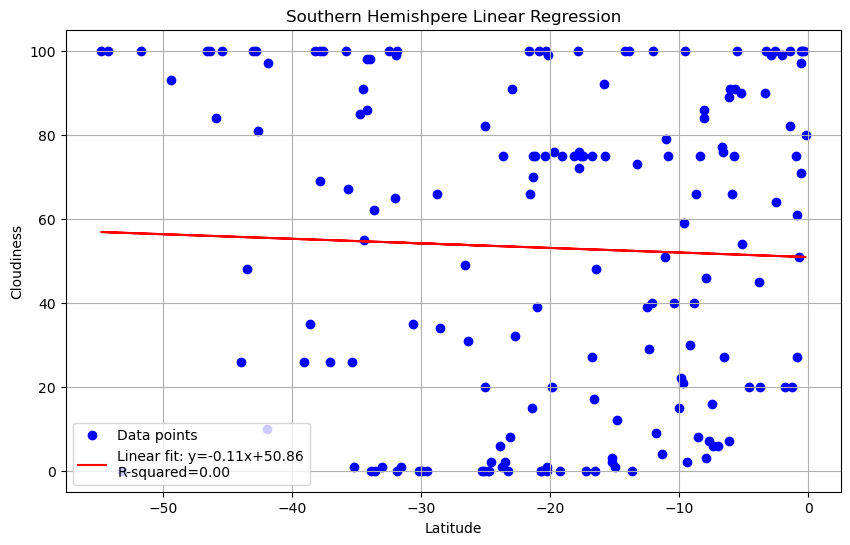

In [74]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], title="Southern Hemishpere Linear Regression", xlabel="Latitude", ylabel="Cloudiness")

**Discussion about the linear relationship:** Similar to the relationship between humidity and latitude, cloudiness does not seem to have a relationship with latitude. Both Northern and Southern hemisphere cities have an r-squared of 0.00, which indicates no linear relationship.

### Wind Speed vs. Latitude Linear Regression Plot

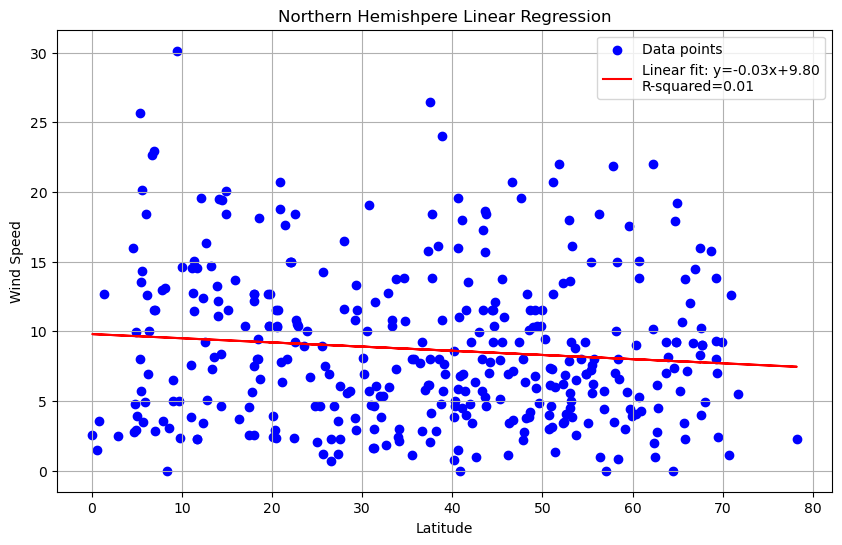

In [75]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], title="Northern Hemishpere Linear Regression", xlabel="Latitude", ylabel="Wind Speed")

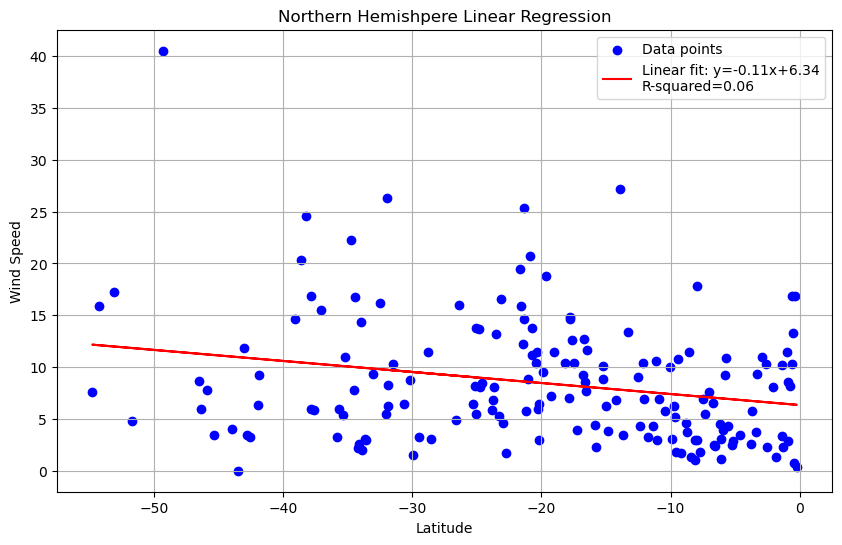

In [76]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], title="Northern Hemishpere Linear Regression", xlabel="Latitude", ylabel="Wind Speed")

**Discussion about the linear relationship:** The relationship between wind speed and latitude is only slightly higher than humidity and cloudiness. It is greater than zero in both hemispheres but is still so small that the linear relationship is insignificant.